In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *
from featurewiz import FeatureWiz

In [4]:
df_train = pd.read_csv('/Users/tanmaysharma/projects/Jak2Biotech/Datasets/jak2train.csv')
df_test = pd.read_csv('/Users/tanmaysharma/projects/Jak2Biotech/Datasets/jak2test.csv')

In [5]:
fwiz = FeatureWiz(
    corr_limit = 0.70,
    verbose = 2
)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        


In [6]:
X_train = df_train.drop(['cls'], axis = 1)
y_train = df_train['cls']
X_test = df_test.drop(['cls'], axis = 1)
y_test = df_test['cls']

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (9440, 1615)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E

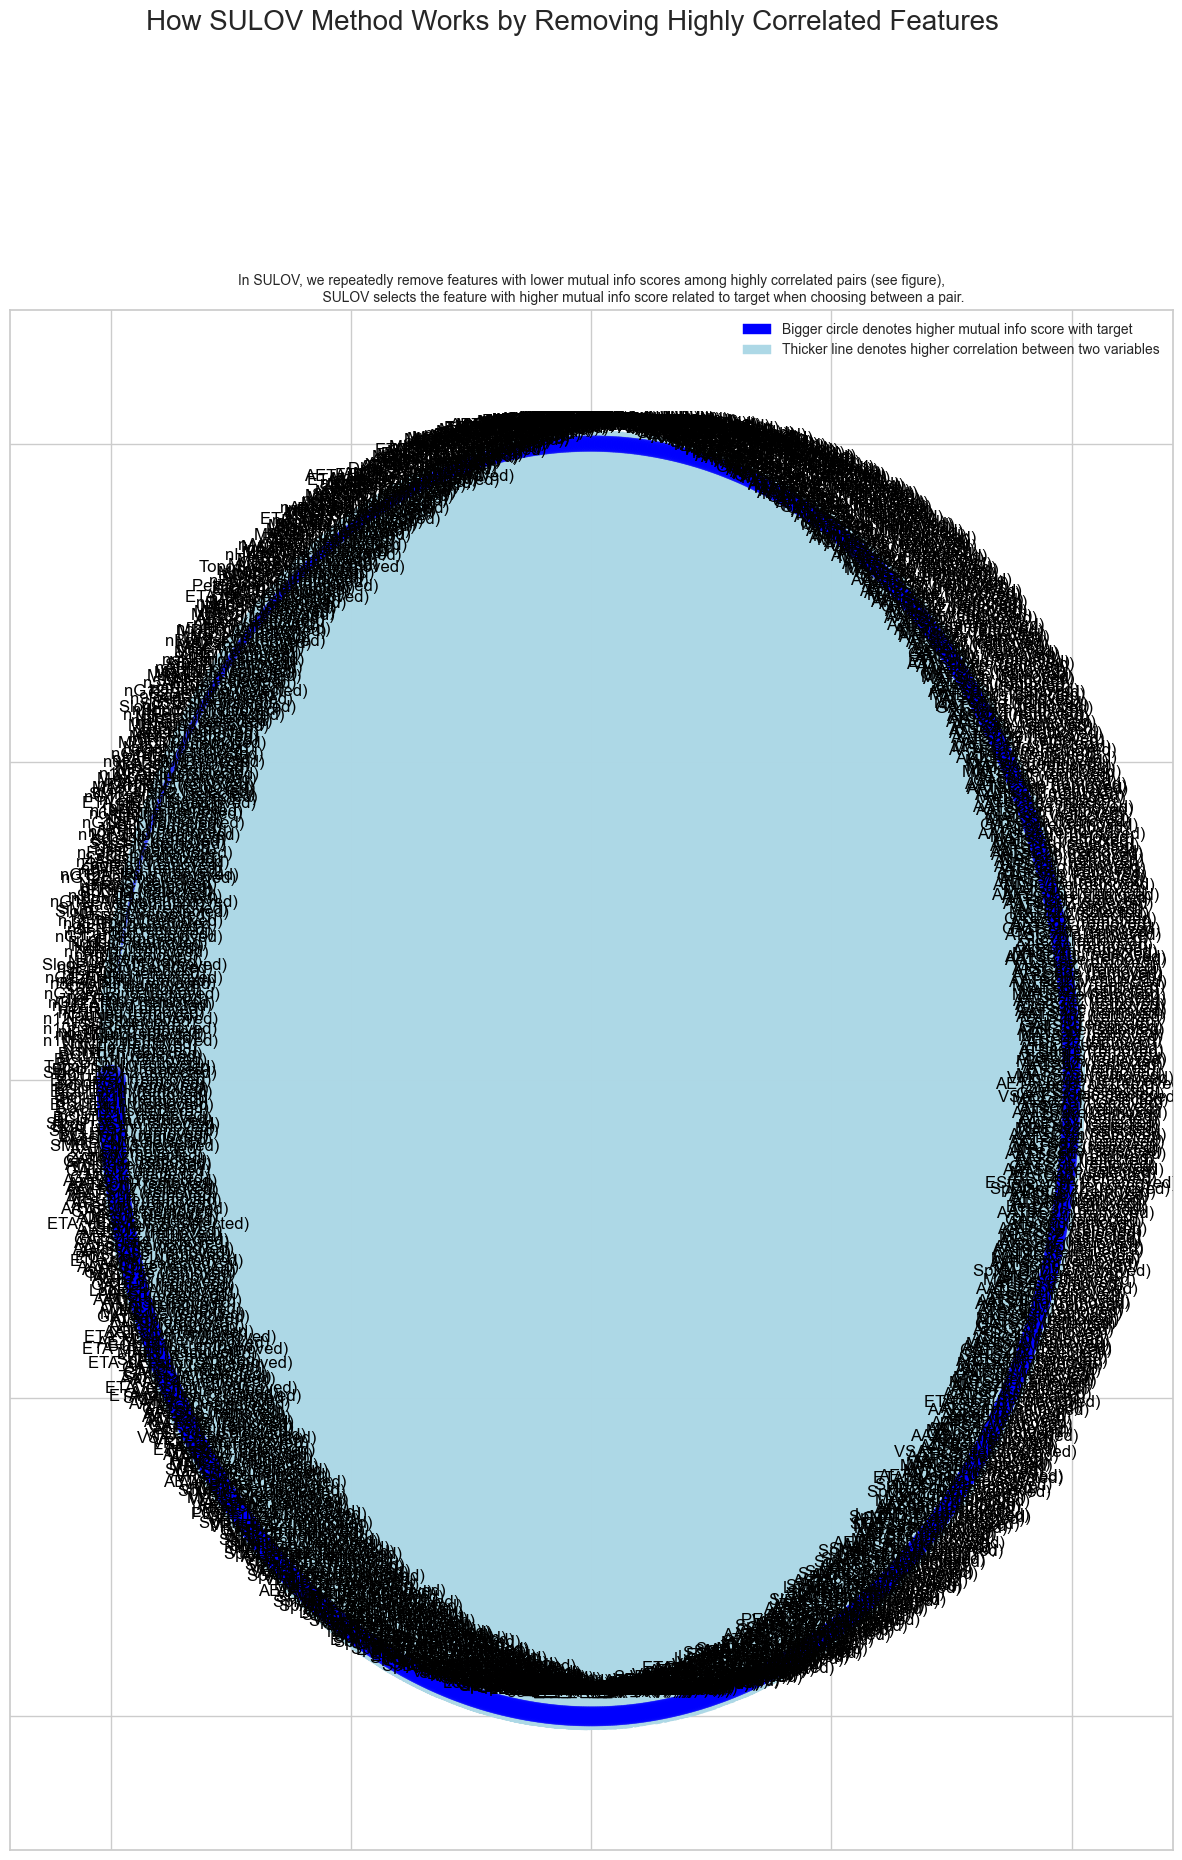

Time taken for SULOV method = 86 seconds
    Adding 0 categorical variables to reduced numeric variables  of 356
Finally 356 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 273 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 4 seconds
            Time taken for regular XGBoost feature selection = 3 seconds
            Time taken for regular XGBoost feature selection = 3 seconds
            Time taken for regular XGBoost feature selection = 2 seconds
            Time taken for regular XGBoost feature selection = 1 secon

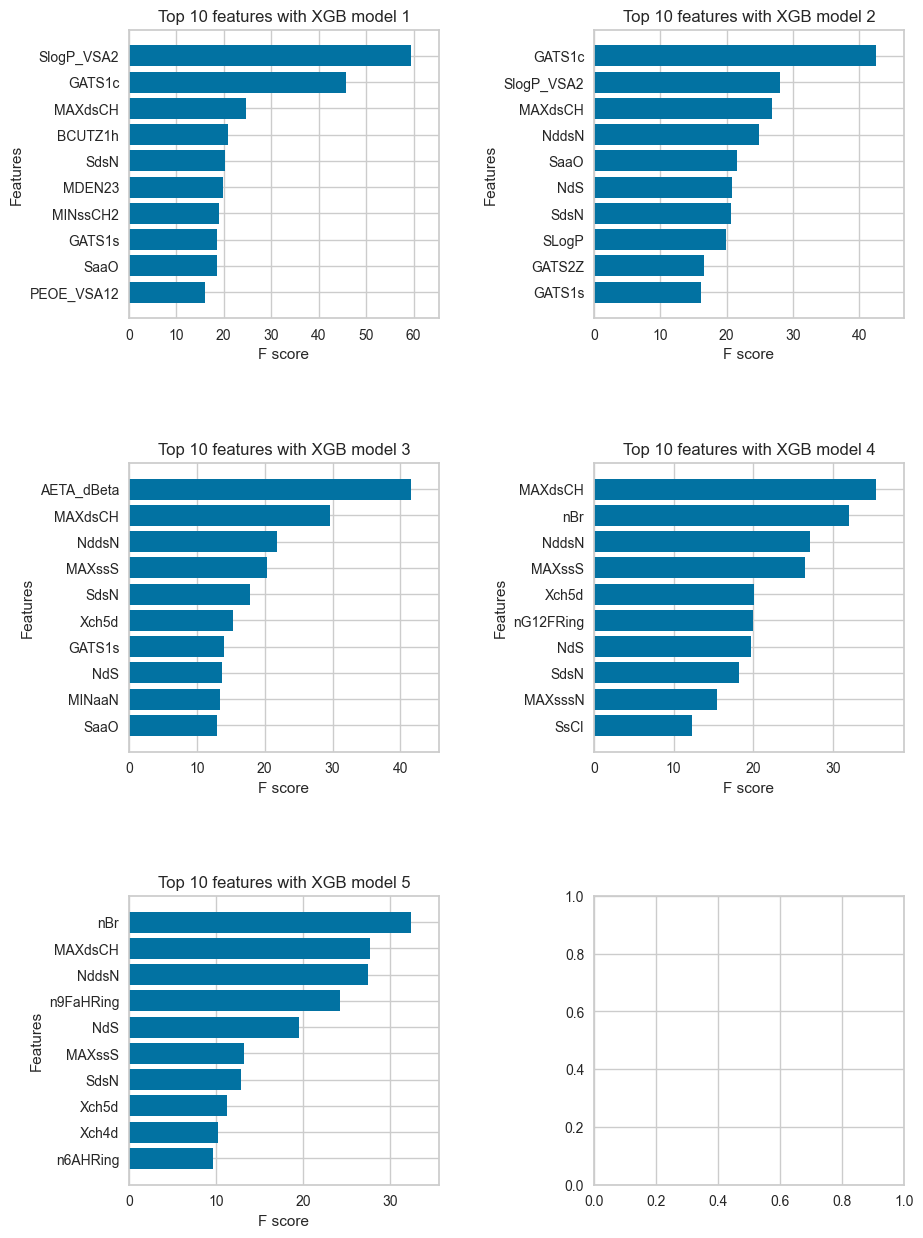

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 296 important features. Too many to print...
Total Time taken for featurewiz selection = 99 seconds
Output contains a list of 296 important features and a train dataframe
    Time taken to create entire pipeline = 103 second(s)


In [14]:
X = fwiz.fit_transform(X_train, y_train)
X_test_selected = fwiz.transform(X_test)

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
X_train_selected = imputer.fit_transform(X)

In [24]:
X_test_selected = imputer.fit_transform(X_test_selected)

In [36]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
X_train_selected = standardScaler.fit_transform(X_train_selected)
X_test_selected = standardScaler.fit_transform(X_test_selected)

In [37]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
catboost_model = catboost.fit(X_train_selected, y_train)


Learning rate set to 0.026869
0:	learn: 0.6825492	total: 29.2ms	remaining: 29.2s
1:	learn: 0.6726210	total: 37.5ms	remaining: 18.7s
2:	learn: 0.6638555	total: 45.3ms	remaining: 15.1s
3:	learn: 0.6565912	total: 53.1ms	remaining: 13.2s
4:	learn: 0.6485397	total: 60.8ms	remaining: 12.1s
5:	learn: 0.6409886	total: 68.9ms	remaining: 11.4s
6:	learn: 0.6327402	total: 77.3ms	remaining: 11s
7:	learn: 0.6259683	total: 85.1ms	remaining: 10.6s
8:	learn: 0.6191041	total: 93ms	remaining: 10.2s
9:	learn: 0.6138980	total: 101ms	remaining: 9.98s
10:	learn: 0.6077331	total: 110ms	remaining: 9.88s
11:	learn: 0.6016602	total: 117ms	remaining: 9.67s
12:	learn: 0.5958594	total: 125ms	remaining: 9.52s
13:	learn: 0.5906709	total: 133ms	remaining: 9.37s
14:	learn: 0.5856209	total: 141ms	remaining: 9.24s
15:	learn: 0.5798374	total: 148ms	remaining: 9.12s
16:	learn: 0.5747320	total: 157ms	remaining: 9.1s
17:	learn: 0.5700838	total: 165ms	remaining: 9.02s
18:	learn: 0.5657058	total: 173ms	remaining: 8.95s
19:	lea

In [38]:
from sklearn.metrics import accuracy_score

catboost_predict = catboost_model.predict(X_test_selected)
accuracy_score(y_test, catboost_predict)

0.889406779661017

In [39]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost_model = xgboost.fit(X_train_selected, y_train)
xgboost_predict = xgboost_model.predict(X_test_selected)
accuracy_score(y_test, xgboost_predict)

0.8966101694915254

In [40]:
y_train

8949    0
1204    1
5293    0
3740    1
6407    0
       ..
5188    0
7890    0
1768    1
3240    1
7203    0
Name: cls, Length: 9440, dtype: int64

In [41]:
X_train_selected

array([[ 0.93703249, -0.74677714,  1.78161962, ..., -0.10399453,
        -0.10002613, 11.40662575],
       [ 1.14270832, -0.76010809, -0.08173889, ..., -0.10399453,
        -0.10002613, -0.08766834],
       [ 1.02520948,  0.25674778, -0.3447153 , ..., -0.10399453,
        -0.10002613, -0.08766834],
       ...,
       [-0.07130809, -1.29121409,  0.24325433, ..., -0.10399453,
        -0.10002613, -0.08766834],
       [-1.11365294,  0.21089405, -0.361839  , ..., -0.10399453,
        -0.10002613, -0.08766834],
       [-0.23206962,  1.7750479 , -0.437778  , ..., -0.10399453,
        -0.10002613, -0.08766834]])

In [42]:
import tpot

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(xgscoring='accuracy', cv=cv)